In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
from pandas import Timestamp
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### People

| Field         | Description                                       |
|---------------|---------------------------------------------------|
| ID            | Customer's unique identifier                      |
| Year_Birth    | Customer's birth year                             |
| Education     | Customer's education level                        |
| Marital_Status| Customer's marital status                         |
| Income        | Customer's yearly household income                |
| Kidhome       | Number of children in customer's household        |
| Teenhome      | Number of teenagers in customer's household       |
| Dt_Customer   | Date of customer's enrollment with the company    |
| Recency       | Number of days since customer's last purchase     |
| Complain      | 1 if customer complained in the last 2 years, 0 otherwise |

### Products

| Field            | Description                                  |
|------------------|----------------------------------------------|
| MntWines         | Amount spent on wine in last 2 years          |
| MntFruits        | Amount spent on fruits in last 2 years        |
| MntMeatProducts  | Amount spent on meat in last 2 years          |
| MntFishProducts  | Amount spent on fish in last 2 years          |
| MntSweetProducts | Amount spent on sweets in last 2 years        |
| MntGoldProds     | Amount spent on gold in last 2 years          |

### Promotion

| Field             | Description                                              |
|-------------------|----------------------------------------------------------|
| NumDealsPurchases | Number of purchases made with a discount                 |
| AcceptedCmp1      | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2      | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3      | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4      | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5      | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| Response          | 1 if customer accepted the offer in the last campaign, 0 otherwise |

### Place

| Field               | Description                                           |
|---------------------|-------------------------------------------------------|
| NumWebPurchases     | Number of purchases made through the company’s website|
| NumCatalogPurchases | Number of purchases made using a catalog              |
| NumStorePurchases   | Number of purchases made directly in stores           |
| NumWebVisitsMonth   | Number of visits to the company’s website in the last month |


In [3]:
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,ID,int64,0.000000,False,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0.000000,False,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0.000000,False,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0.000000,False,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1.071429,False,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,0.000000,False,3,"[0, 1, 2]"
6,Teenhome,int64,0.000000,False,3,"[0, 1, 2]"
7,Dt_Customer,object,0.000000,False,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,int64,0.000000,False,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,0.000000,False,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


In [4]:
filtered_df = df.copy(deep=True)
filtered_df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [5]:
filtered_df['Dt_Customer'] = pd.to_datetime(filtered_df['Dt_Customer'], format="%d-%m-%Y")
filtered_df.dtypes['Dt_Customer']

dtype('<M8[ns]')

Hasil `'dtype('<M8[ns]')` menunjukkan bahwa tipe data kolom tersebut adalah datetime atau tipe data `datetime64[ns]` dalam Pandas.

In [6]:
# Dropping redundant columns
filtered_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
filtered_df.drop(filtered_df.tail(1).index,inplace=True) # Last row was full of NaN values
filtered_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,0,2,7,0,0,0,0,0,0,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

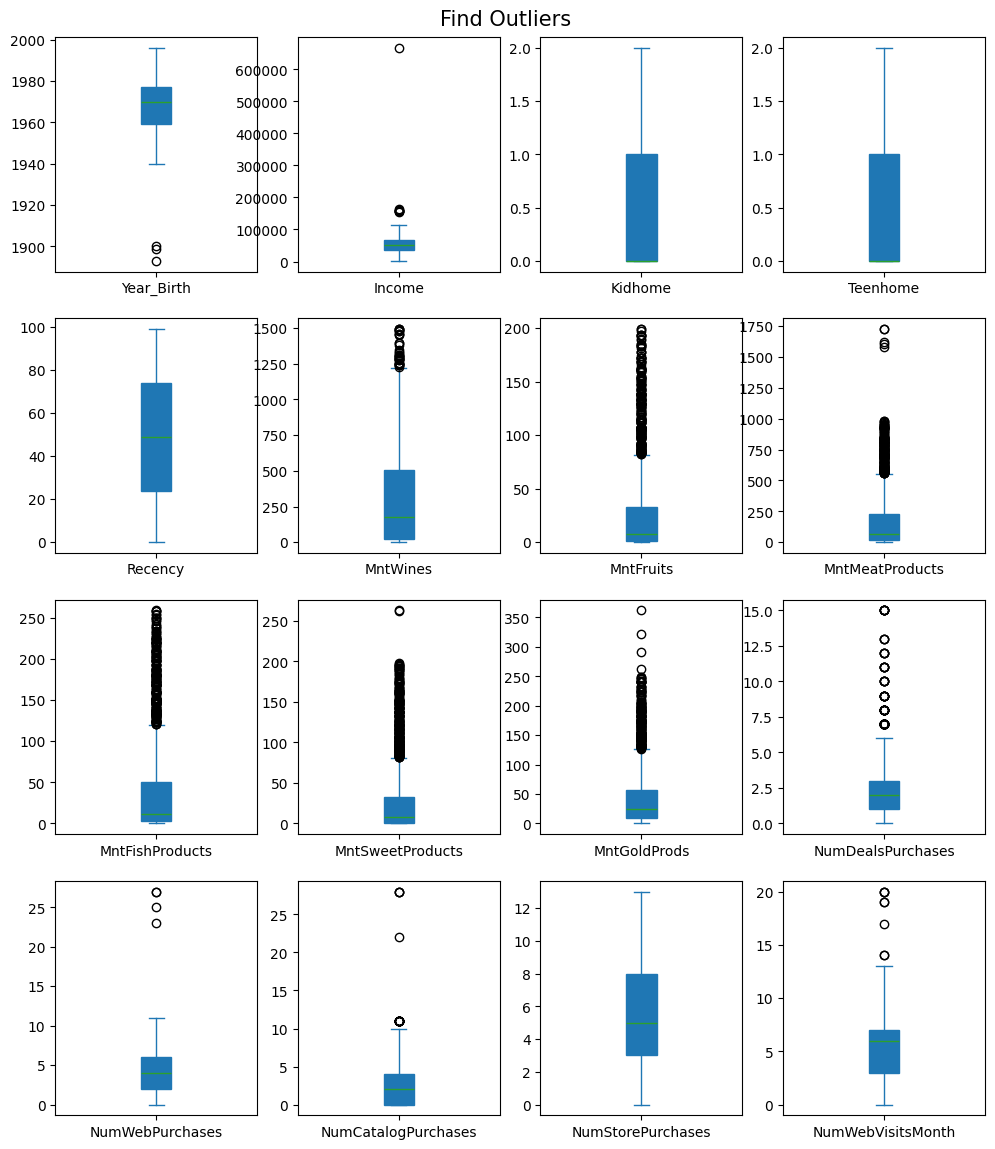

In [7]:
# See if there is any outliers

# select columns to plot
df_to_plot = filtered_df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.show

In [8]:
# Filling NaN values with median considering Education and Marital_Status
filtered_df['Income'] = filtered_df['Income'].fillna(filtered_df.groupby(['Education', 'Marital_Status'])['Income'].transform('median'))

In [9]:
filtered_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [10]:
# Convert year of birth to Age
filtered_df = filtered_df.rename(columns={'Year_Birth': 'Age'})
filtered_df['Age'] = 2014 - filtered_df['Age']

# Adding amount spent
filtered_df['Amount_Spent'] = filtered_df['MntWines'] + filtered_df['MntFruits'] + filtered_df['MntMeatProducts'] + filtered_df['MntFishProducts'] + filtered_df['MntSweetProducts'] + filtered_df['MntGoldProds']
filtered_df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

# Adding number of childs
filtered_df['Children'] = filtered_df['Kidhome'] + filtered_df['Teenhome']
filtered_df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

# Adding number of purchases
filtered_df['Purchases'] = filtered_df['NumWebPurchases'] + filtered_df['NumCatalogPurchases'] + filtered_df['NumStorePurchases']
filtered_df.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1, inplace=True)

filtered_df

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Amount_Spent,Children,Purchases
0,5524,57,Graduation,Single,58138.0,2012-09-04,58,3,7,0,0,0,0,0,0,1,1617,0,22
1,2174,60,Graduation,Single,46344.0,2014-03-08,38,2,5,0,0,0,0,0,0,0,27,2,4
2,4141,49,Graduation,Together,71613.0,2013-08-21,26,1,4,0,0,0,0,0,0,0,776,0,20
3,6182,30,Graduation,Together,26646.0,2014-02-10,26,2,6,0,0,0,0,0,0,0,53,1,6
4,5324,33,PhD,Married,58293.0,2014-01-19,94,5,5,0,0,0,0,0,0,0,422,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,40,Graduation,Married,34421.0,2013-07-01,81,1,7,0,0,0,0,0,0,0,30,1,3
2235,10870,47,Graduation,Married,61223.0,2013-06-13,46,2,5,0,0,0,0,0,0,0,1341,1,16
2236,4001,68,PhD,Together,64014.0,2014-06-10,56,7,7,0,0,0,1,0,0,0,444,3,15
2237,7270,33,Graduation,Divorced,56981.0,2014-01-25,91,1,6,0,1,0,0,0,0,0,1241,0,18


### 1.1 **Pengelompokan Umur**
Pengelompokan umur pada tingkat global umumnya dibagi menjadi tiga kategori utama, meskipun ada variasi tergantung pada sumber dan konteksnya:

- **Children** *(0-14 tahun)*:<br>
Sekitar seperempat dari total populasi dunia berada dalam kelompok umur ini. Kelompok umur ini umumnya dianggap sebagai kelompok anak-anak yang masih dalam tahap pertumbuhan dan perkembangan, dan belum memasuki usia kerja.

- **Adult** *(15-64 tahun)*:<br>
Sekitar setengah dari populasi dunia berada dalam kelompok umur yang seharusnya 25 - 64 tahun, yang sering dianggap sebagai kelompok usia kerja. Kelompok umur ini mencakup individu yang paling produktif dan aktif dalam kegiatan ekonomi. Dalam konteks ini, kelompok umur 15-24 tahun kemungkinan juga termasuk dalam kelompok usia kerja, meskipun tidak disebutkan secara eksplisit.

- **Elder** *(65 tahun ke atas)*:<br>
Sekitar 10% dari populasi dunia berada dalam kelompok umur ini. Kelompok umur ini umumnya dianggap sebagai kelompok lanjut usia, yang mungkin sudah pensiun dari kegiatan ekonomi aktif.

Untuk referensi pengelompokan umur bisa di lihat [disini](https://hbs.unctad.org/age-structure/#:~:text=World%20population%20by%20age%20group,successively%20smaller%20than%20younger%20classes).



### 1.2 **Pengelompokan Pendapatan**
Pengelompokan pendapatan dengan menggunakan kuartil adalah metode yang umum digunakan dalam statistik untuk mengkategorikan data ke dalam empat kelompok sebanding. Ini dapat dilakukan tanpa harus memperhatikan mata uang atau negara asal data tersebut. Kuartil adalah titik yang membagi data menjadi empat kelompok yang memiliki jumlah data yang hampir sama.

Pertama, Anda perlu mengurutkan data pendapatan dari yang terkecil hingga yang terbesar. Lalu, Anda dapat menghitung kuartil sebagai berikut:

- **Kuartil Pertama** *(Q1)*: Ini adalah nilai yang membagi 25% data terkecil dari sisi bawah. Untuk menghitungnya, gunakan rumus:
*Q1 = 1/4 * (n + 1)* data

- **Kuartil Kedua** *(Q2)*: Ini adalah nilai tengah data Anda, yang juga dikenal sebagai median. Untuk menghitungnya, gunakan rumus:
*Q2 = 1/2 * (n + 1)* data

- **Kuartil Ketiga** *(Q3)*: Ini adalah nilai yang membagi 75% data terkecil dari sisi bawah. Untuk menghitungnya, gunakan rumus:
*Q3 = 3/4 * (n + 1)* data

- **Kuartil Keempat** *(Q4)*: Ini adalah nilai tertinggi dalam data Anda.

In [11]:
# Grouping and dropping rows filled with absurd values
filtered_df['Marital_Status'] = filtered_df['Marital_Status'].replace({'Alone': 'Single', 'Widow': 'Single', 'YOLO': 'Single', 'Divorced': 'Single', 'Absurd': 'Single', 'Married': 'Together'})
filtered_df['Education']=filtered_df['Education'].replace({'Basic': 'Undergraduate', '2n Cycle': 'Postgraduate', 'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'})

# Creating age segments based on the provided age ranges
filtered_df['Age_Group'] = pd.cut(filtered_df['Age'], bins=[0, 14, 64, float('inf')], labels=['Children', 'Adult', 'Elder'])

# Creating income segments based on quartiles
filtered_df['Income_Group'] = pd.qcut(filtered_df['Income'], q=4, labels=['Lowest', 'Low', 'High', 'Highest'])

# Using quantiles to delete outliers 
income_upper_limit = filtered_df['Income'].quantile(0.99)
income_lower_limit = filtered_df['Income'].quantile(0.01)
filtered_df = filtered_df[(filtered_df['Income'] <= income_upper_limit) & (filtered_df['Income'] >= income_lower_limit)]
age_lower_limit = filtered_df['Age'].quantile(0.99)
filtered_df = filtered_df[(filtered_df['Age'] <= age_lower_limit)]

# Drop some rows which were duplicates
filtered_df = filtered_df.drop_duplicates(subset=['Income','Education','Marital_Status','Age'], ignore_index=True)
filtered_df

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Amount_Spent,Children,Purchases,Age_Group,Income_Group
0,5524,57,Graduate,Single,58138.0,2012-09-04,58,3,7,0,...,0,0,0,0,1,1617,0,22,Adult,High
1,2174,60,Graduate,Single,46344.0,2014-03-08,38,2,5,0,...,0,0,0,0,0,27,2,4,Adult,Low
2,4141,49,Graduate,Together,71613.0,2013-08-21,26,1,4,0,...,0,0,0,0,0,776,0,20,Adult,Highest
3,6182,30,Graduate,Together,26646.0,2014-02-10,26,2,6,0,...,0,0,0,0,0,53,1,6,Adult,Lowest
4,5324,33,Postgraduate,Together,58293.0,2014-01-19,94,5,5,0,...,0,0,0,0,0,422,1,14,Adult,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,9817,44,Postgraduate,Single,44802.0,2012-08-21,71,2,8,0,...,0,0,0,0,0,1049,0,25,Adult,Low
1967,8080,28,Graduate,Single,26816.0,2012-08-17,50,1,4,0,...,0,0,0,0,0,22,0,3,Adult,Lowest
1968,10870,47,Graduate,Together,61223.0,2013-06-13,46,2,5,0,...,0,0,0,0,0,1341,1,16,Adult,High
1969,7270,33,Graduate,Single,56981.0,2014-01-25,91,1,6,0,...,0,0,0,0,0,1241,0,18,Adult,High


In [12]:
# Reordering the columns to make the AcceptedCmp columns consecutive and in order
# First, we create a list of the column names, ordered as desired
ordered_columns = [
    'ID', 'Dt_Customer', 'Age_Group', 'Age', 'Education', 'Marital_Status','Income_Group' , 'Income', 
    'Recency', 'NumDealsPurchases', 'NumWebVisitsMonth', 
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
    'Complain', 'Response', 'Amount_Spent', 'Children', 'Purchases'
]

# Then, we reassign the dataframe only with these ordered columns
filtered_df = filtered_df[ordered_columns]

# Show the first few rows of the dataframe to verify the new order
filtered_df.head()


,ID,Dt_Customer,Age_Group,Age,Education,Marital_Status,Income_Group,Income,Recency,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Amount_Spent,Children,Purchases
0,5524,2012-09-04,Adult,57,Graduate,Single,High,58138.0,58,3,...,0,0,0,0,0,0,1,1617,0,22
1,2174,2014-03-08,Adult,60,Graduate,Single,Low,46344.0,38,2,...,0,0,0,0,0,0,0,27,2,4
2,4141,2013-08-21,Adult,49,Graduate,Together,Highest,71613.0,26,1,...,0,0,0,0,0,0,0,776,0,20
3,6182,2014-02-10,Adult,30,Graduate,Together,Lowest,26646.0,26,2,...,0,0,0,0,0,0,0,53,1,6
4,5324,2014-01-19,Adult,33,Postgraduate,Together,High,58293.0,94,5,...,0,0,0,0,0,0,0,422,1,14


In [15]:
# function to split that customer never accepted the campaign or accepted once or more
def campaign(filtered_df):
    if filtered_df[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Response']].sum() == 0:
        return 'Never Accepted'
    else :
        return 'Accepted once or more'

filtered_df['campaignAccept'] = filtered_df.apply(campaign, axis=1)

### General Information

| Field         | Description                                       |
|---------------|---------------------------------------------------|
| ID            | Customer's unique identifier                      |
| Dt_Customer   | Date of customer's enrollment with the company    |
| Age_Group     | Categorical representation of age                  |
| Age           | Customer's age                                    |
| Education     | Customer's education level                        |
| Marital_Status| Customer's marital status                         |
| Income_Group  | Categorical representation of income              |
| Income        | Customer's yearly household income                |

### Products and Spending

| Field            | Description                                  |
|------------------|----------------------------------------------|
| Amount_Spent     | Total amount spent                           |

### Promotion

| Field             | Description                                              |
|-------------------|----------------------------------------------------------|
| NumDealsPurchases | Number of purchases made with a discount                 |
| AcceptedCmp1      | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2      | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3      | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4      | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5      | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| Complain          | 1 if the customer complained in the last 2 years, 0 otherwise |
| Response          | 1 if the customer accepted the offer in the last campaign, 0 otherwise |
| campaignAccept    | Categorical information on campaign acceptance           |

### Household Information

| Field         | Description                                   |
|---------------|-----------------------------------------------|
| Children      | Number of children in customer's household    |

### Purchasing Behavior

| Field         | Description                                   |
|---------------|-----------------------------------------------|
| Purchases     | Total number of purchases                     |
| Recency       | Number of days since customer's last purchase |


In [16]:
# saving data to csv
filtered_df.to_csv("cleandata.csv", index=False)